<a href="https://colab.research.google.com/github/ReinaldoJr10/Treino-de-algoritmo-de-ia-/blob/main/trabalho_2_Reinaldo_e_Rodrigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa 1

## Letra A 
## <p>A primeira coisa que fazemos é importar todas as bibliotecas necessárias para fazer a analide dos dados.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import xlrd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans
from numpy.ma.core import mean
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing


Abaixo fazemos a importação dos dados do formato csv para uma base de dados local. Em seguida, separamos os dados de entrada(x) e os dados de saida(y).

In [ ]:
dados=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv", header=0)

xDados=dados.drop(columns=['DEATH_EVENT']) # xDados recebe todo o data frame exceto a coluna target "DEATH_EVENT"
yDados=dados['DEATH_EVENT'] # yDados recebe apenas a coluna target "DEATH_EVENT"

<p>1/3 TESTE 
<p>2/3 TREINO

In [ ]:
#separando os dados em treino e teste seguindo a proporção 1/3 teste e 2/3 treino
xTreino, xTeste, yTreino, yTeste = train_test_split(xDados,yDados, train_size=0.66)

gnb = GaussianNB().fit(xTreino,yTreino) # cria e treina o modelo

print("A acurácia do modelo construido foi de",gnb.score(xTeste,yTeste)) # compara os resultados obtidos pelo modelo com o yTeste ja conhecido da base de dados

A acurácia do modelo construido foi de 0.8137254901960784


<p>1/4 TESTE 
<p>3/4 TREINO

In [ ]:

#separando os dados em treino e teste seguindo a proporção 1/4 teste e 3/4 treino
xTreino2, xTeste2, yTreino2, yTeste2 = train_test_split(xDados,yDados, train_size=0.75)

gnb2 = GaussianNB().fit(xTreino2,yTreino2)  # cria e treina o modelo

print("A acurácia do modelo construido foi de ",gnb2.score(xTeste2,yTeste2))# compara os resultados obtidos pelo modelo com o yTeste ja conhecido da base de dados

A acurácia do modelo construido foi de  0.7866666666666666


## Letra B
<p>Kmeans

In [ ]:
algoritmoNB=GaussianNB()
for n in range(5,11):
  dadosKfold=KFold(n, shuffle=True)
  dados_acuracia=cross_val_score(algoritmoNB,xDados,yDados,cv=dadosKfold)
  plt.plot(dados_acuracia)
  plt.show()
  print('\nNumero do Kfold: ',n,
        '\nAcurácia Máxima: ',max(dados_acuracia)*100, '%',
        '\nAcuracia Mínima: ',min(dados_acuracia)*100, '%',
        '\nAcurácia Média: ', mean(dados_acuracia)*100, '%')

LETRA C


### Divisão estratificada dos dados
<p>1/3 TESTE 
<p>2/3 TREINO 

In [ ]:
#separando os dados em treino e teste seguindo a proporção 1/3 teste e 2/3 treino
xTreino, xTeste, yTreino, yTeste = train_test_split(xDados,yDados, train_size=0.66, stratify=yDados)

algoritmo=GaussianNB().fit(xTreino,yTreino)

print("A acuracia do modelo construido foi de ",algoritmo.score(xTeste,yTeste))

A acuracia do modelo construido foi de  0.7941176470588235


<p>1/4 TESTE 
<p>3/4 TREINO 

In [ ]:
#separando os dados em treino e teste seguindo a proporção 1/4 teste e 3/4 treino
xTreino2, xTeste2, yTreino2, yTeste2 = train_test_split(xDados,yDados, train_size=0.75, stratify=yDados)

algoritmo2=GaussianNB().fit(xTreino2,yTreino2)

print("A acuracia do modelo construido foi de ",algoritmo2.score(xTeste2,yTeste2))

A acuracia do modelo construido foi de  0.76


Kmeans estratificado

In [ ]:
for n in range(5,11):
  algoritmo3=GaussianNB()
  dadosKfoldEstratificado = StratifiedKFold(n_splits=n)
  dados_acuracia=cross_val_score(algoritmoNB,xDados,yDados,cv=dadosKfoldEstratificado)
  plt.plot(dados_acuracia)
  plt.show()
  print('\nNumero do Kfold: ',n,
        '\nAcurácia Máxima: ',max(dados_acuracia)*100, '%',
        '\nAcuracia Mínima: ',min(dados_acuracia)*100, '%',
        '\nAcurácia Média: ', mean(dados_acuracia)*100, '%')


# Tarefa 2
<p>O caso escolhido foi o de 75% para treino e 25% para teste, ela foi a que apresentou um resultado mais alto quando testado diversas vezes, destacando que ele é o caso estratificado de dados. Usamos um valor minimo de 2 dados(o padrão) por nó interno para fazer a construção da árvore, o valor foi escolhido por oferecer uma boa separação de dados dentro da árvore e por não ter muita ambiguidade nas respostas. Quando usamos valores maiores temos nós com mesmo resultados sendo subdividos em nós iguais que não oferecem nenhum padrão claro de analise.<p>

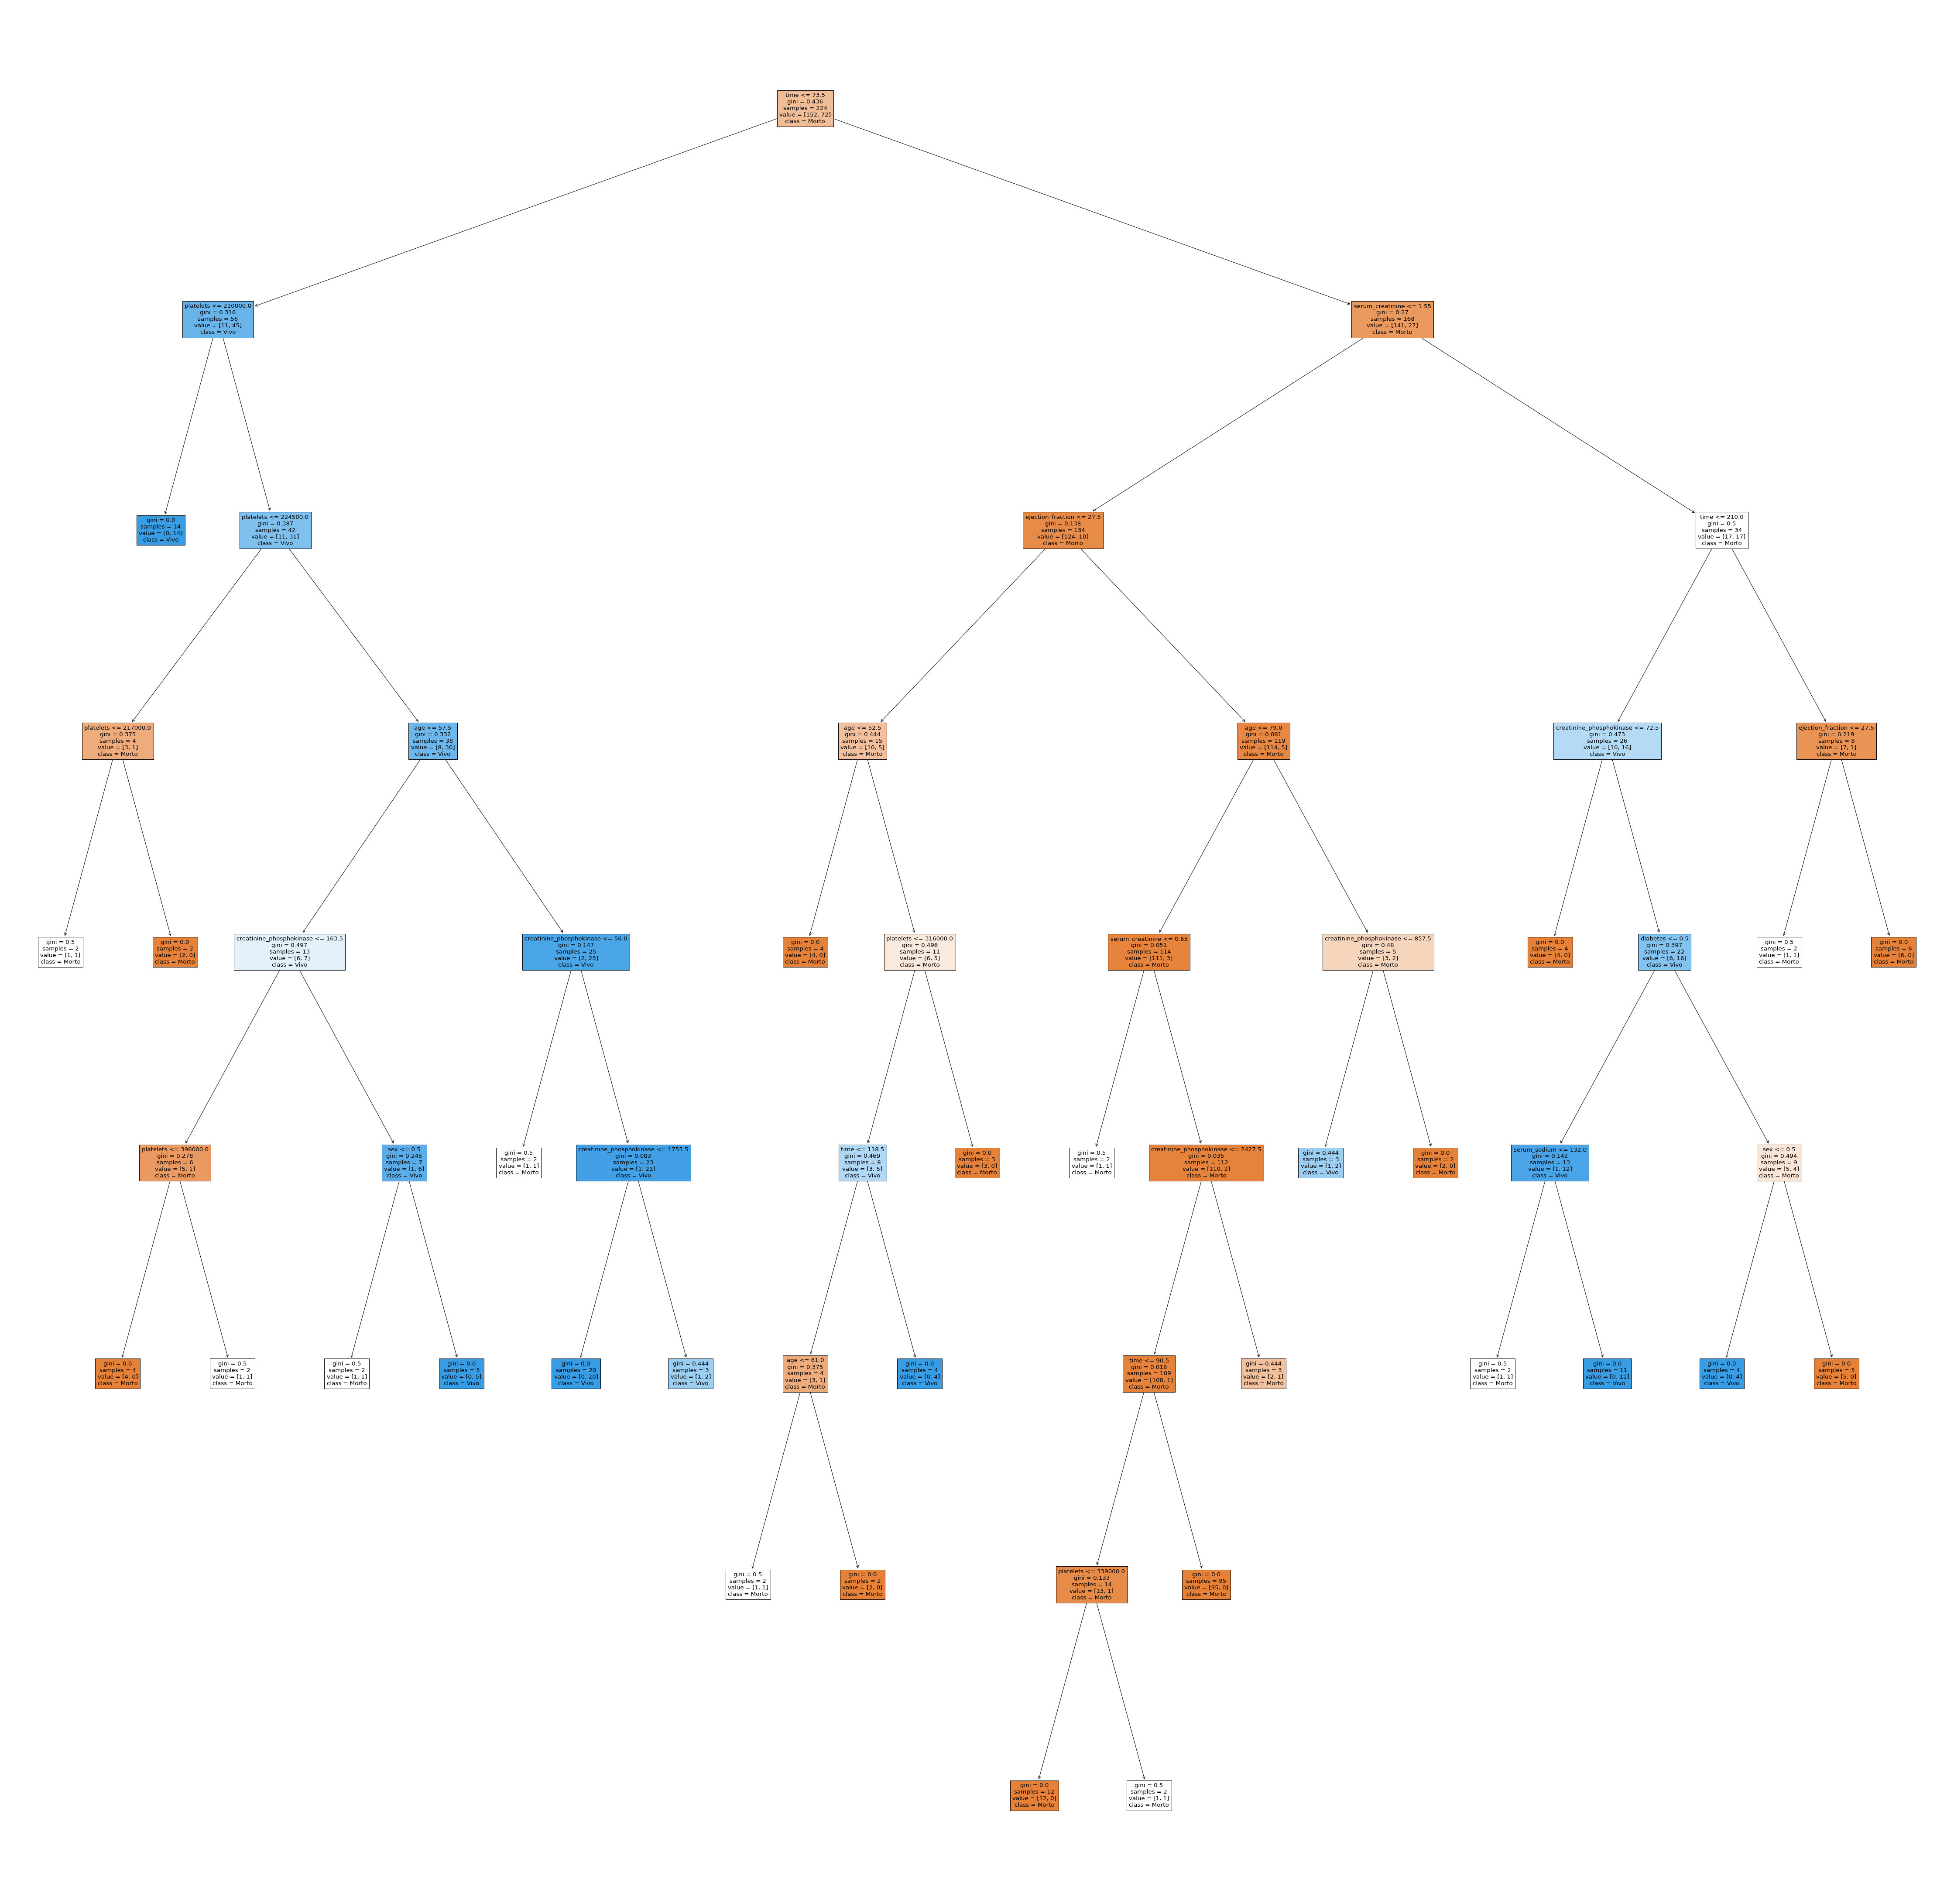

A acuracia do modelo construido foi de  0.8533333333333334


In [ ]:

xTreino3, xTeste3, yTreino3, yTeste3 = train_test_split(xDados,yDados, train_size=0.75, stratify=yDados)

Arvore=DecisionTreeClassifier(min_samples_leaf=2).fit(xTreino3,yTreino3) # cria o modelo da arvore de decisão, com minimo de 2 amostras por nó folha e treina o modelo
yResultados3=Arvore.predict(xTeste3) # yResultados recebe a previsão dos resultados
 
# plota o gráfico da arvore de decisões
plt.figure(figsize=(80,80)) 
plot_tree(Arvore,feature_names=dados.columns,class_names=['Morto','Vivo'],filled=True)
plt.show()

print("A acuracia do modelo construido foi de ",accuracy_score(yResultados3, yTeste3)) # compara o resultado obtido pelo modelo com os valores de teste conhecidos do data frame 


# Tarefa 3
## Importando os dados
<p>A primeira coisa que fazemos é importar a base de dados que vamos analisarmos, nesse caso ela é uma que contém informações sobre incêndios na Argélia. A base de dados tem 12 campos independentes e mais um que classifica se tem fogo ou não.

In [ ]:
dados_incendios=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00547/Algerian_forest_fires_dataset_UPDATE.csv",header=1)

dados_incendios['day']=pd.to_numeric(dados_incendios['day'], errors='coerce')
dados_incendios['month']=pd.to_numeric(dados_incendios['month'], errors='coerce')
dados_incendios['year']=pd.to_numeric(dados_incendios['year'], errors='coerce')
dados_incendios['month']=pd.to_numeric(dados_incendios['month'], errors='coerce')
dados_incendios['Temperature']=pd.to_numeric(dados_incendios['Temperature'], errors='coerce')
dados_incendios[' RH']=pd.to_numeric(dados_incendios[' RH'], errors='coerce')
dados_incendios[' Ws']=pd.to_numeric(dados_incendios[' Ws'], errors='coerce')
dados_incendios['Rain ']=pd.to_numeric(dados_incendios['Rain '], errors='coerce')
dados_incendios['FFMC']=pd.to_numeric(dados_incendios['FFMC'], errors='coerce')
dados_incendios['DMC']=pd.to_numeric(dados_incendios['DMC'], errors='coerce')
dados_incendios['DC']=pd.to_numeric(dados_incendios['DC'], errors='coerce')
dados_incendios['ISI']=pd.to_numeric(dados_incendios['ISI'], errors='coerce')
dados_incendios['BUI']=pd.to_numeric(dados_incendios['BUI'], errors='coerce')
dados_incendios['FWI']=pd.to_numeric(dados_incendios['FWI'], errors='coerce')


xIncendios=dados_incendios.drop(columns='Classes  ')
yIncendios=dados_incendios['Classes  ']

auxiliar=[]
for n in yIncendios:  
  if(len(str(n))==7):
    auxiliar.append(1)
  else:
    auxiliar.append(0)
yIncendios=pd.DataFrame(auxiliar,columns=['Classes'])
dados_incendios['Classes  ']=yIncendios['Classes']

dados_incendios=dados_incendios.dropna()


Aqui separamos a base de dados em duas versões, uma com dados de incendios com fogo e outra onde não aconteceram os incendios.

In [ ]:
TemFogo=dados_incendios['Classes  ']==1
SemFogo=dados_incendios['Classes  ']==0
dados_com_fogo=dados_incendios[TemFogo]
dados_sem_fogo=dados_incendios[SemFogo]

<p> Abaixo, fazemos uma análise para descobrir o melhor número de cluster para cada base de dados. Fazendo um gráfico de 1 até 11 cluster. Ao final, identificamos que o valor 2 tem o que chamamos de joelho do gráfico e serve como um parâmetro de número de cluster para os casos onde existe fogo. Para os casos sem fogo, obtemos um resultado semelhante onde o 2 é o melhor valor.

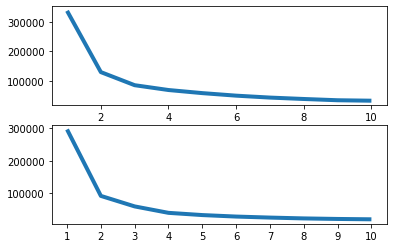

In [ ]:
lista=[]
for n in range(1,11):
  modelo = KMeans(n_clusters=n)
  grupos = modelo.fit_predict(dados_com_fogo)
  lista.append(modelo.inertia_)

lista2=[]
for n in range(1,11):
  modelo = KMeans(n_clusters=n)
  grupos = modelo.fit_predict(dados_sem_fogo)
  lista2.append(modelo.inertia_)

fig, (ax1, ax2) = plt.subplots(2)

plt.style.use("fivethirtyeight")
ax1.plot(range(1, 11), lista)
plt.xticks(range(1, 11))

ax2.plot(range(1, 11), lista2)
plt.xticks(range(1, 11))

plt.show()

## Analise dos dados obtidos
<p>Abaixo usamos o número de cluster igual a 2 para gerar um gráfico para cada banco de dados, fazendo uma média da temperatura podemos perceber que o segundo banco de dados possui temperaturas mais frias. Isso ocorre pois ela é composta por dados onde não tem fogo.

<p>Além disso, nos gráficos usamos dois parâmetros principais para achar um padrão de grupo, o primeiro é o Índice de Húmus(DC) e o segundo é o Índice de Seca(DMC). Esses dois parâmetros são usados para calcular a quantidade de combustivel disponivel, também conhecido como BUI.

<p>Nos casos onde ocorreu fogo, temos dois grupos bem definidos e que mostra que havia mais combustível disponível nessa áreas. Já no gráfico sem fogo, temos uma concentração menor de combustível para queima e temperaturas mais baixas, o que já era esperado em um lugar que não ocorreu incêndios.

No link abaixo tem uma descrição mais detalhada dos indices do banco de dados: 
<p>[IPMA - Indice](https://www.ipma.pt/pt/enciclopedia/otempo/risco.incendio/index.html)




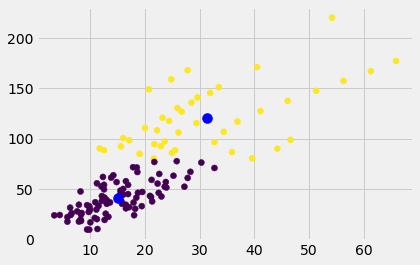

A media de temperatura com fogo é  33.83969465648855  e o Índice de Combustível Disponível é  22.846564885496186


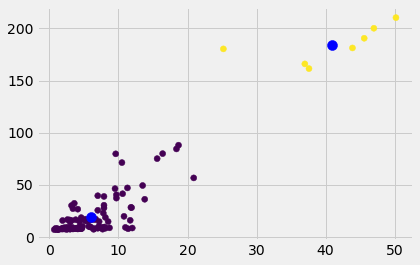

A media de temperatura sem fogo é  30.178571428571427  e o Índice de Combustível Disponível é  9.49017857142857


In [ ]:
modelo = KMeans(n_clusters=2,random_state=42)
grupos = modelo.fit_predict(dados_com_fogo)
label = modelo.labels_
centroides = modelo.cluster_centers_
plt.scatter(dados_com_fogo['DMC'],dados_com_fogo['DC'],c=grupos)
plt.scatter(centroides[:, 8],centroides[:,9], s = 100, c = 'blue', label = 'Centroides')
plt.show()
print("A media de temperatura com fogo é ",dados_com_fogo['Temperature'].mean()," e o Índice de Combustível Disponível é ",dados_com_fogo['BUI'].mean())

modelo2 = KMeans(n_clusters=2,random_state=42)
grupos2 = modelo2.fit_predict(dados_sem_fogo)
label2 = modelo2.labels_
centroides2 = modelo2.cluster_centers_
plt.scatter(dados_sem_fogo['DMC'], dados_sem_fogo['DC'],c=grupos2)
plt.scatter(centroides2[:, 8],centroides2[:,9], s = 100, c = 'blue', label = 'Centroides')
plt.show()
print("A media de temperatura sem fogo é ",dados_sem_fogo['Temperature'].mean()," e o Índice de Combustível Disponível é ",dados_sem_fogo['BUI'].mean())